## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [3]:
import pandas as pd
df = pd.read_csv('ha_1.csv')


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import numpy as np

df['diagnosis_encoded'] = LabelEncoder().fit_transform(df['diagnosis'])  # Encode target variable

X = df[['age', 'chol']]
y = df['diagnosis_encoded']

# Fit Logistic
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Coefficients and intercept of the model
coef = log_reg.coef_[0]
intercept = log_reg.intercept_[0]

# Cholesterol level for a 55-year-old with predicted probability of 0.5
age = 55
prob_threshold = 0.5

# Using the logistic regression equation
chol_threshold = (np.log(prob_threshold / (1 - prob_threshold)) - intercept - coef[0] * age) / coef[1]

chol_threshold


367.87488979868016

For a 55-year-old individual, their cholesterol level would need to be approximately 368 mg/dL for doctors to predict that heart disease is present, based on the logistic regression model.

In [5]:
# Cholesterol level for a 55-year-old with a predicted probability of 90%
prob_threshold_90 = 0.9

# Using the logistic regression equation for a 90% probability
chol_threshold_90 = (np.log(prob_threshold_90 / (1 - prob_threshold_90)) - intercept - coef[0] * age) / coef[1]

chol_threshold_90


1587.7158792750618

For a 55-year-old individual, their cholesterol level would need to be approximately 1588 mg/dL for doctors to estimate a 90% chance that heart disease is present, based on the logistic regression model.


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Fit LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Extract LDA coefficients and intercept
lda_coef = lda.coef_[0]
lda_intercept = lda.intercept_[0]

# Cholesterol level for a 55-year-old with LDA prediction threshold
chol_lda_threshold = -(lda_intercept + lda_coef[0] * age) / lda_coef[1]

chol_lda_threshold


368.2353575299383

For a 55-year-old individual, their cholesterol level would need to be approximately 368.2 mg/dL for doctors to predict that heart disease is present based on the Linear Discriminant Analysis (LDA) model.

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning 
param_grid = {'C': [0.1, 1, 10, 100]}

# Create a GridSearchCV object with a linear kernel
grid_search = GridSearchCV(SVC(kernel='linear', probability=True), param_grid, cv=5)
grid_search.fit(X, y)

# Retrieve the best estimator 
svc = grid_search.best_estimator_

# Extract SVC coefficients and intercept 
svc_coef = svc.coef_[0]
svc_intercept = svc.intercept_[0]

# Cholesterol level for a 55-year-old 
age = 55
chol_svc_threshold = -(svc_intercept + svc_coef[0] * age) / svc_coef[1]

chol_svc_threshold


312.70883227583215

For a 55-year-old individual, their cholesterol level would need to be approximately 368.2 mg/dL for doctors to predict that heart disease is present based on the Support Vector Classifier (SVC).

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


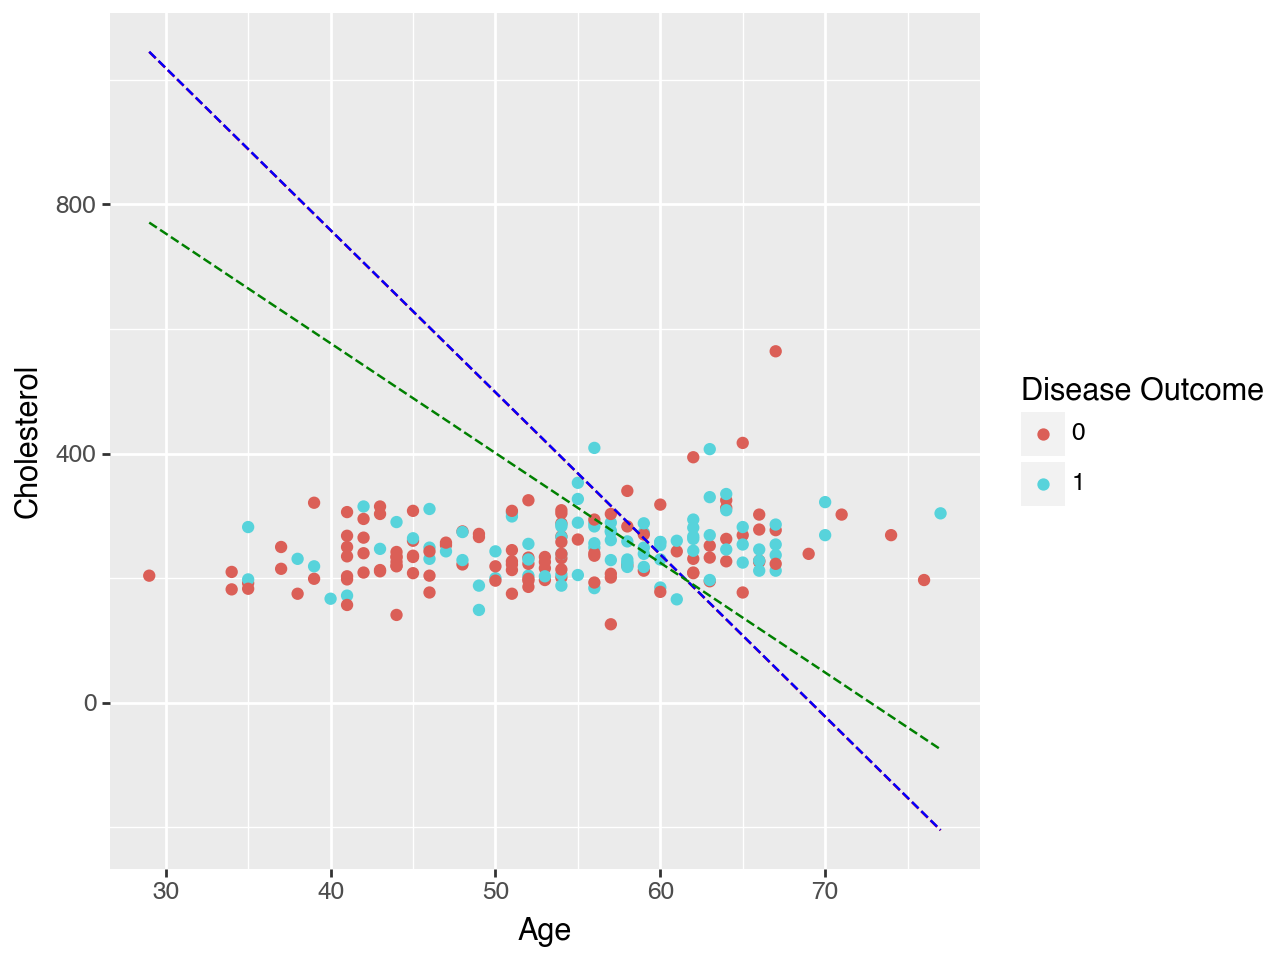

In [9]:
from plotnine import *
import numpy as np
import pandas as pd

# Scatterplot of age and cholesterol with true disease outcomes
plot = (
    ggplot(df, aes(x='age', y='chol', color='factor(diagnosis_encoded)'))
    + geom_point()
    + labs(x='Age', y='Cholesterol', color='Disease Outcome')
)

def calculate_decision_boundary(model, x_range):
    if hasattr(model, 'coef_') and hasattr(model, 'intercept_'):
        coef = model.coef_[0]
        intercept = model.intercept_[0]
        y_boundary = -(intercept + coef[0] * x_range) / coef[1]
        return y_boundary
    else:
        return None

# 1. Logistic Regression Decision Boundary
x_range_log = np.linspace(df['age'].min(), df['age'].max(), 100)
y_boundary_log = calculate_decision_boundary(log_reg, x_range_log)

if y_boundary_log is not None:
    df_log_boundary = pd.DataFrame({'age': x_range_log, 'chol': y_boundary_log})
    plot += geom_line(aes(x='age', y='chol'), data=df_log_boundary, color='red', linetype='dashed')

# 2. LDA Decision Boundary
x_range_lda = np.linspace(df['age'].min(), df['age'].max(), 100)
y_boundary_lda = -(lda_intercept + lda_coef[0] * x_range_lda) / lda_coef[1]
df_lda_boundary = pd.DataFrame({'age': x_range_lda, 'chol': y_boundary_lda})
plot += geom_line(aes(x='age', y='chol'), data=df_lda_boundary, color='blue', linetype='dashed')

# 3. SVC Decision Boundary (for linear kernel)
if hasattr(svc, 'coef_'):
    x_range_svc = np.linspace(df['age'].min(), df['age'].max(), 100)
    y_boundary_svc = calculate_decision_boundary(svc, x_range_svc) 
    df_svc_boundary = pd.DataFrame({'age': x_range_svc, 'chol': y_boundary_svc})
    plot += geom_line(aes(x='age', y='chol'), data=df_svc_boundary, color='green', linetype='dashed')



The three models (Logistic Regression, LDA, and SVC) create linear decision boundaries, each reflecting different assumptions. Logistic Regression (red line) centers the boundary based on log-odds but may struggle with overlapping data. LDA (blue line) focuses on maximizing class separation, tilting the boundary slightly toward capturing age variability. SVC (green line) optimizes the margin between classes and provides a more distinct separation, especially where classes are more clearly divided. SVC seems to perform best overall, but model choice depends on the balance between simplicity, interpretability, and accuracy.